In [64]:
from hmmlearn.hmm import GMMHMM
import numpy as np
import pickle

# Unpickling (de-serializing) the dictionary
with open("games.pkl", "rb") as file:
    games = pickle.load(file)

# Training data from game corresponding to Game ID 2009092001
observations = games[2009092001][0].reshape(-1,1)

# Define the GaussianHMM with number of components equaling the number of "momenta" states
model = GMMHMM(n_components=7, n_iter=1000)

# Train on the observations
model.fit(observations)

preds = model.predict(observations)

[np.float64(1.0), np.float64(-9.0), np.float64(-6.0), np.float64(-6.0), np.float64(-5.0), np.float64(-2.0), np.float64(-0.0), np.float64(7.0), np.float64(-4.0), np.float64(-2.0), np.float64(-0.0), np.float64(-1.0), np.float64(6.0), np.float64(-7.0), np.float64(-5.0), np.float64(2.0), np.float64(7.0), np.float64(3.0), np.float64(-13.0), np.float64(7.0), np.float64(8.0), np.float64(-0.0), np.float64(-0.0), np.float64(-4.0), np.float64(15.0), np.float64(-8.0), np.float64(-15.0), np.float64(-2.0), np.float64(2.0), np.float64(-2.0), np.float64(-18.0), np.float64(4.0), np.float64(6.0), np.float64(10.0), np.float64(-25.0), np.float64(-2.0), np.float64(1.0), np.float64(-5.0), np.float64(1.0), np.float64(-5.0), np.float64(-0.0), np.float64(-2.0), np.float64(-2.0), np.float64(-3.0), np.float64(-9.0), np.float64(-4.0), np.float64(-4.0), np.float64(-7.0), np.float64(-17.0), np.float64(-2.0), np.float64(-10.0), np.float64(-11.0), np.float64(-19.0), np.float64(-5.0), np.float64(3.0), np.float64(8.0)

Text(0, 0.5, 'Yards Gained')

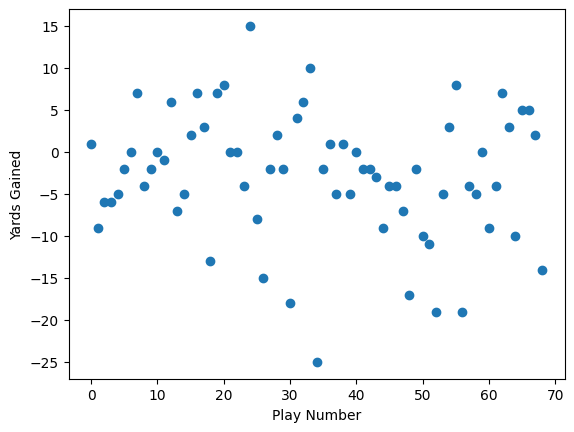

In [71]:
from matplotlib import pyplot as plt

curr_hidden = preds[-1]

# N = length of test set
N = len(games[2009092001][0])

# print(model.means_)
# print(model.covars_)

forecast = []
for _ in range(N):
    hidden_probs = model.transmat_.T[:,curr_hidden]
    new_hidden = np.random.choice(np.arange(len(hidden_probs), dtype=int), p=hidden_probs)
    
    new_obs = np.round(np.random.normal(model.means_[new_hidden].flatten()[0], np.sqrt(model.covars_[new_hidden].flatten()[0])))
    forecast.append(new_obs)
    curr_hidden = new_hidden
    
print(forecast)
plt.scatter(np.arange(len(forecast)), forecast)
plt.xlabel("Play Number")
plt.ylabel("Yards Gained")